In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from keras.utils.np_utils import to_categorical 
from keras import backend as K
from keras.layers import Dense, Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Activation

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
df = pd.read_csv('archive/dataset.csv')
print(df.shape)
df.head()

(1600, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,203,203,207,208,212,208,214,219,222,...,82,88,101,162,161,163,162,163,163,163
1,1,205,205,207,208,212,208,215,220,223,...,164,165,166,165,165,164,163,164,162,164
2,8,201,205,205,208,212,208,214,220,222,...,164,166,163,162,162,164,165,161,161,161
3,1,200,203,205,207,209,206,213,218,221,...,163,162,163,164,163,164,162,162,162,162
4,1,202,204,208,210,212,209,216,219,223,...,166,165,163,164,164,165,165,165,165,165


(1600, 784)


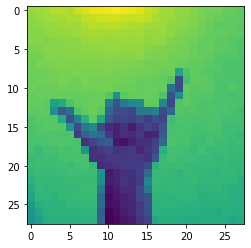

In [3]:
train=df.values[0:,1:]
print(train.shape)
labels = df.values[0:,0]

labels = to_categorical(labels)
sample = train[123]
# print(sample)
plt.imshow(sample.reshape((28,28)))

(1600, 784) (1600, 10)
(1600, 28, 28, 1) (1600, 10)


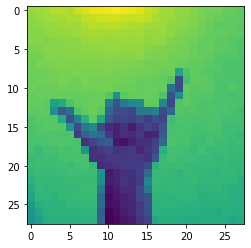

In [4]:
print(train.shape,labels.shape)
#normalizing the dataset
train=train/255
train=train.reshape((1600,28,28,1))
plt.imshow(train[123].reshape((28,28)))
print(train.shape,labels.shape)

In [5]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size = (3,3),input_shape = (28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size = (3,3),padding = 'same',activation = 'relu'))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

h=model.fit(train, labels, validation_split=0.3, epochs=16,batch_size=64)

Epoch 1/16
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpc0_k38bs.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpc0_k38bs.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
18/18 [==============================] - 11s 72ms/step - loss: 2.3043 - accuracy: 0.1019 - val_loss: 2.2836 - val_accuracy: 0.2083
Epoch 2/16
18/18 [==============================] - 1s 44ms/step - loss: 2.2556 - accuracy: 0.2121 - val_loss: 2.1015 - val_accuracy: 0.4125
Epoch 3/16
18/18 [==============================] - 1s 42ms/step - loss: 1.9483 - accuracy: 0.4525 - val_loss: 1.

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [6]:
model.save('sign_model.h5')

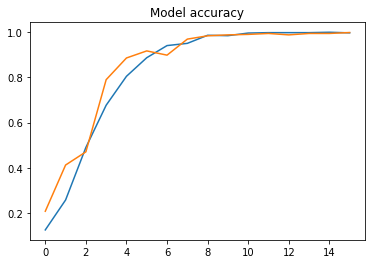

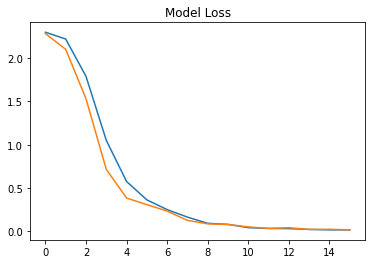

In [7]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model accuracy')
plt.show()

plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Model Loss')
plt.show()

10


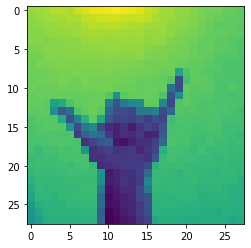

In [8]:
LOC = 123
alpha = ['1','2','3','4','5','6','7','8','9','10']

sample = train[LOC]
plt.imshow(sample.reshape((28,28)))
lbl=labels[LOC]
print(alpha[list(lbl).index(1)])

In [9]:
sample=sample.reshape((1,28,28,1))
res=model.predict(sample)
res=list(res[0])
mx=max(res)
print(alpha[res.index(mx)])

10


2


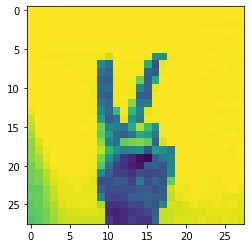

In [10]:
import cv2

temp = plt.imread("archive/test2.png")
temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
plt.imshow(temp)

temp = temp.reshape((1,28,28,1))
res = model.predict(temp)
res = list(res[0])
mx = max(res)
print(alpha[res.index(mx)])



In [12]:
import tkinter
from tkinter import *
import statistics
from statistics import mode
import tensorflow as tf
import tensorflow.keras

model = tensorflow.keras.models.load_model("sign_model.h5")
digit_array = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
digits = cv2.imread("archive/digits.png")
white = cv2.imread("archive/white.png")


def predict_letter(image):
    image = image.reshape((1, 28, 28, 1))
    res = model.predict(image)
    res = list(res[0])
    mx = max(res)
    return digit_array[res.index(mx)]


def view_signs():
    cv2.imshow('Sign Digits', digits)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


def run_digit_recognition():
    cap = cv2.VideoCapture(0)
    history = [""]
    max_freq_array = ["" for _ in range(20)]
    freq_num = 0

    while True:
        ret, frame = cap.read()
        frame = cv2.flip(frame, 1)

        grayFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # grayFrame = cv2.bitwise_not(grayFrame)
        rect_img = grayFrame[100:400, 300:600]
        resized_image = cv2.resize(rect_img, (28, 28))

        # predict the sign
        ans_letter = predict_letter(resized_image)
        text = "Predicted Digit = " + ans_letter

        # to find the most accurate predicted sign
        max_freq_array[freq_num % 20] = ans_letter
        freq_num += 1
        current_best_number = mode(max_freq_array)
        if history[0] != current_best_number:
            history = [current_best_number] + history[:]

        white_temp = white.copy()
        cv2.putText(white_temp, "history",
                    (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (139, 0, 0), 2)
        cv2.putText(white_temp, ",".join(history),
                    (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (139, 0, 0),  2)
        cv2.imshow('Recorded Predictions', white_temp)

        # display captured images and grayscale
        frame = cv2.rectangle(frame, (300, 100), (600, 400), (139, 0, 0), 5)
        cv2.putText(frame, text,
                    (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (139, 0, 0),  2)

        cv2.imshow('Video gray', rect_img)
        cv2.imshow('Video original', frame)

        # outline predicted sign in the sign chart
        temp_ans = int(ans_letter)-1
        pt1x = int(1161 * temp_ans / 9)
        pt2x = int(1161 * (temp_ans + 1) / 9)
        digits_temp = digits.copy()
        digits_temp = cv2.rectangle(
            digits_temp, (pt1x, 0), (pt2x, 240), (0, 255, 0), 5)
        cv2.imshow('Digits Signs', digits_temp)

        if cv2.waitKey(1) == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


def tkintercallback():
    run_digit_recognition()


def tkintercallback2():
    view_signs()


root = tkinter.Tk()
root.title('Sign Language Prediction')
root.geometry("757x501")
bg = PhotoImage(file="archive/bg.png")
root = Canvas(root, width=757, height=501)
root.pack(fill="both", expand=True)
root.create_image(0, 0, image=bg, anchor="nw")
root.create_text(370, 40, fill="darkblue", font="Times 30 italic bold",
                 text="Welcome to Sign Language Prediction")

B = Button(root, text="Predict Gesture", fg='darkblue',
           font="Times 27 italic bold", command=tkintercallback)
B2 = Button(root, text="View the Signs", fg='darkblue',
            font="Times 27 italic bold", command=tkintercallback2)

B.place(x=60, y=350)
B2.place(x=460, y=350)

root.mainloop()

